# gradient ascent for principal components analysis 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size= 100)
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0,10.,size=100)

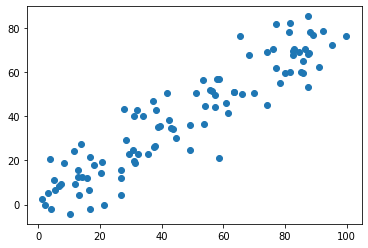

In [50]:
plt.scatter(X[:,0],X[:,1])

## 降维 demean

In [51]:
def demean(X):  
    return X - np.mean(X,axis = 0)
# demean(X)

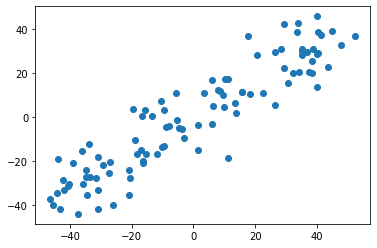

In [52]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])

In [53]:
np.mean(X_demean[:,0]) # == 0

-1.1333156635373598e-14

In [54]:
np.mean(X_demean[:,1]) # == 0

-1.98596694644948e-14

## gradient ascent

![](./1.png) ![](./2.png) ![](./3.png)

In [55]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

![](./4.png)

In [56]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [57]:
def df_debug(w,X,epsilon = 0.0001):
    res = np.empty(len((w)))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] +=epsilon
        w_2 = w.copy()
        w_2[i] -=epsilon
        res[i] = (f(w_1,X)-f(w_2,X))/(2*epsilon)
    return res

In [58]:
def direction(w):
    return w/np.linalg.norm(w) # 求单位向量 
    
def gradient_ascent(df,X,initial_w,eta,n_iters =1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w= w+eta*gradient
        w = direction(w)
 
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter +=1
    return w

In [59]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.19312383, 0.25726546])

In [60]:
eta = 0.001

In [61]:
np.mean(X_demean[:,1 ])

-1.98596694644948e-14

In [62]:
gradient_ascent(df_debug,X_demean,initial_w,eta) 


array([0.7650587 , 0.64396054])

In [63]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)    

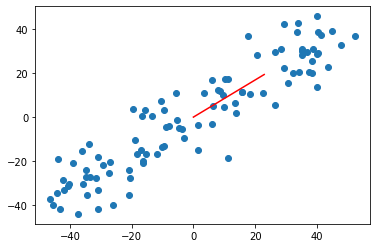

In [64]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color="r")

In [65]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0.,100.,size= 100)
X2[:,1] = 0.75*X2[:,0]+3.

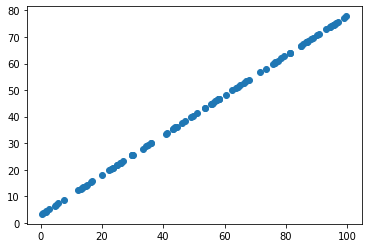

In [66]:
plt.scatter(X2[:,0],X2[:,1])


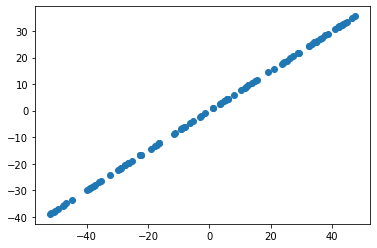

In [67]:
X2_demean = demean(X2)
plt.scatter(X2_demean[:,0],X2_demean[:,1])

In [69]:
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)    
w2

array([0.79999969, 0.60000041])

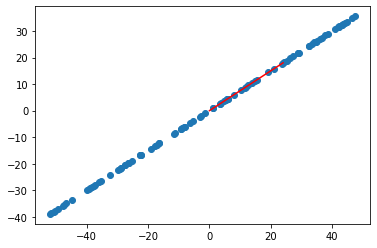

In [70]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0]*30],[0,w2[1]*30],color="r")

# N 个主成分